In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
weather_df = pd.read_csv('../datas/weather_cleaned.csv')  # Columns: Date, temperature, humidity, windspeed
sleep_df = pd.read_csv('../datas/sleep_cleaned.csv')      # Columns: Date, sleepDuration
step_df = pd.read_csv('../datas/step_cleaned.csv')        # Columns: Date, stepCount

weather_df['Date'] = pd.to_datetime(weather_df['Date'])
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'])
step_df['Date'] = pd.to_datetime(step_df['Date'])

In [9]:
# Display the first few rows of each dataframe
print("Weather Data:")
print(weather_df.head())

print("\nSleep Data:")
print(sleep_df.head())

print("\nStep Data:")
print(step_df.head())

# Check for missing values
print("\nMissing Values in Weather Data:")
print(weather_df.isnull().sum())

print("\nMissing Values in Sleep Data:")
print(sleep_df.isnull().sum())

print("\nMissing Values in Step Data:")
print(step_df.isnull().sum())

Weather Data:
   Unnamed: 0       Date  temperature  humidity  windspeed
0           0 2024-07-01         25.9      67.5       27.2
1           1 2024-07-02         27.1      68.3       19.6
2           2 2024-07-03         27.5      61.9       28.7
3           3 2024-07-04         25.2      75.1       24.2
4           4 2024-07-05         24.5      71.8       26.1

Sleep Data:
   Unnamed: 0       Date  sleepDuration
0           0 2024-07-01       7.887778
1           1 2024-07-02       8.314444
2           2 2024-07-03       8.044722
3           3 2024-07-04       8.088056
4           4 2024-07-05       7.751667

Step Data:
   Unnamed: 0       Date  stepCount
0           0 2024-07-01       5882
1           1 2024-07-02       2498
2           2 2024-07-03       3178
3           3 2024-07-04       6168
4           4 2024-07-05       6304

Missing Values in Weather Data:
Unnamed: 0     0
Date           0
temperature    0
humidity       0
windspeed      0
dtype: int64

Missing Values in S

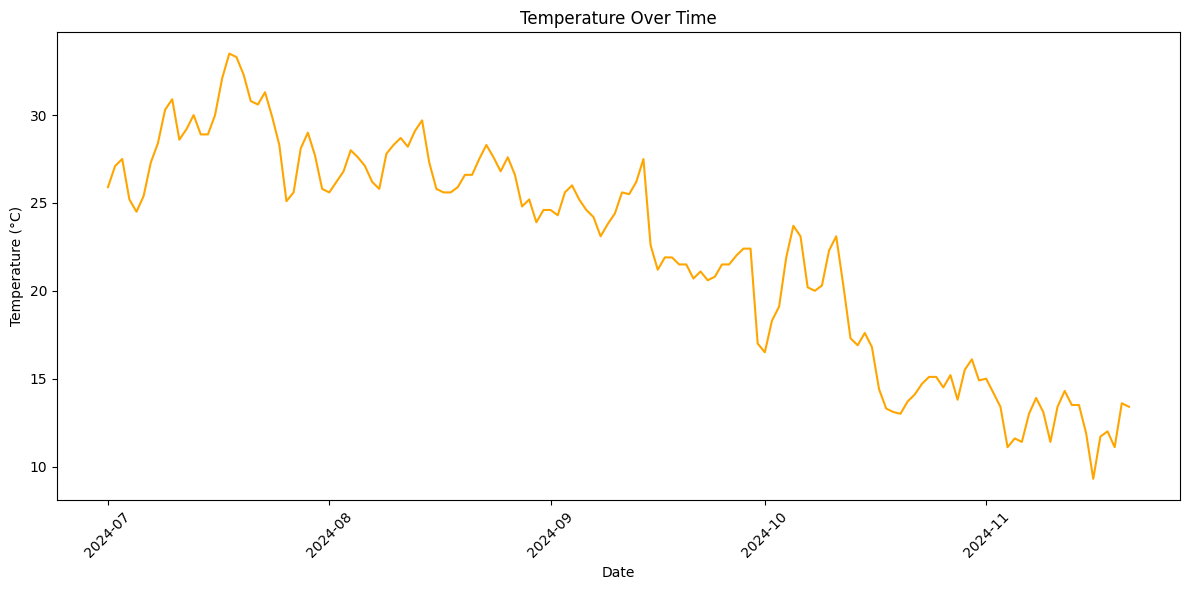

In [12]:
# temperature line plot
plt.figure(figsize=(12, 6))
plt.plot(weather_df['Date'], weather_df['temperature'], color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

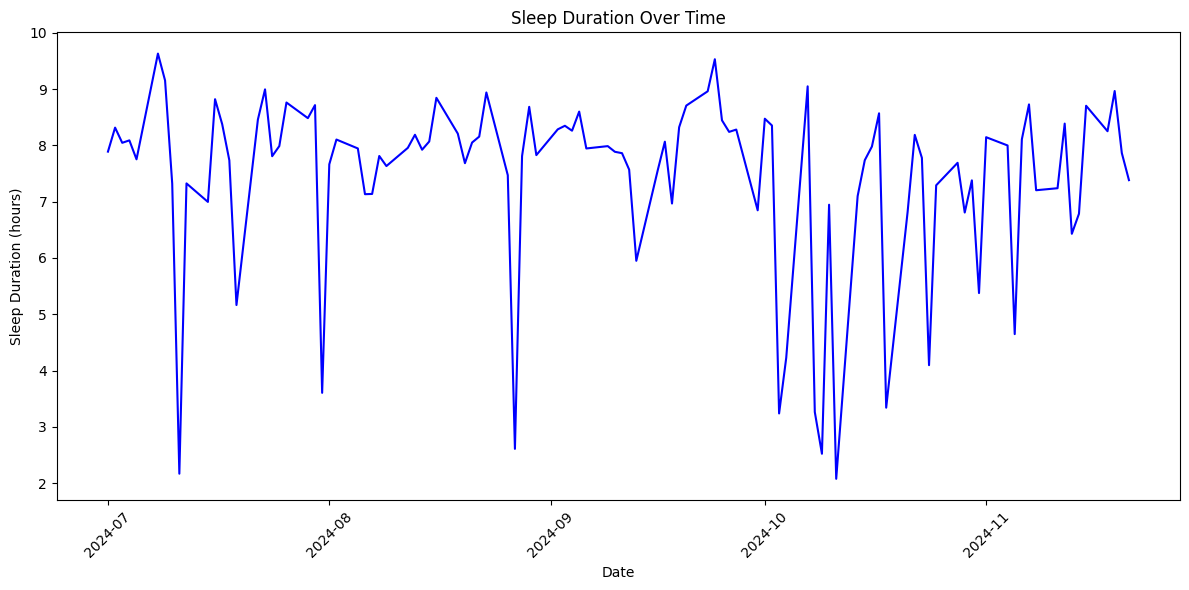

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(sleep_df['Date'], sleep_df['sleepDuration'], color='blue')
plt.title('Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

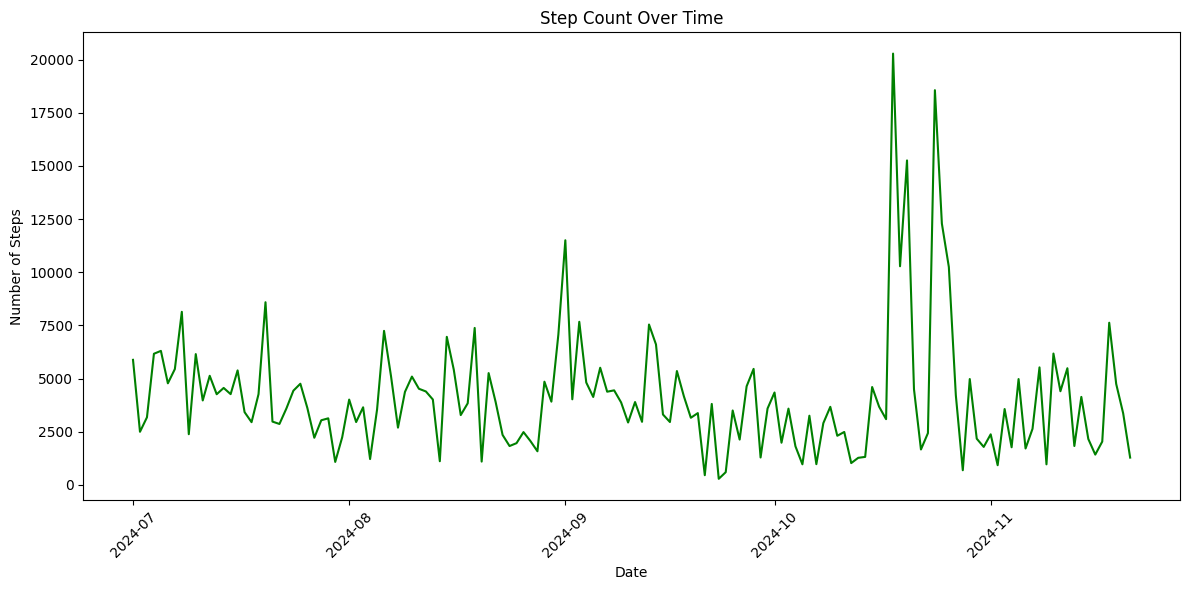

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(step_df['Date'], step_df['stepCount'], color='green')
plt.title('Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

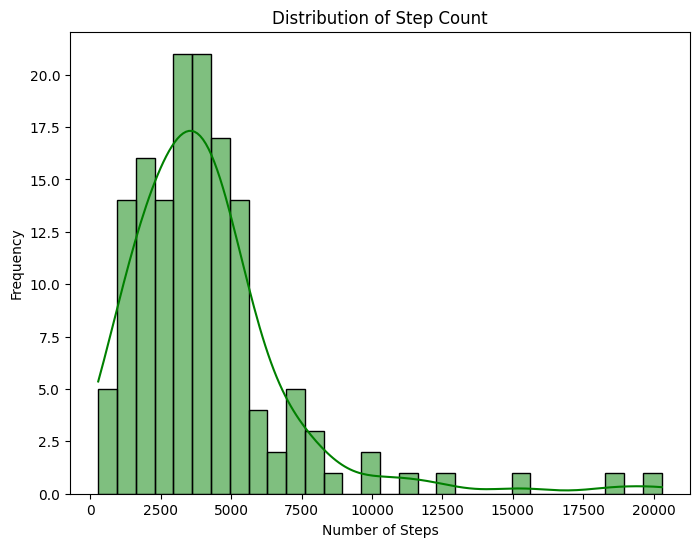

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(step_df['stepCount'], bins=30, kde=True, color='green')
plt.title('Distribution of Step Count')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()

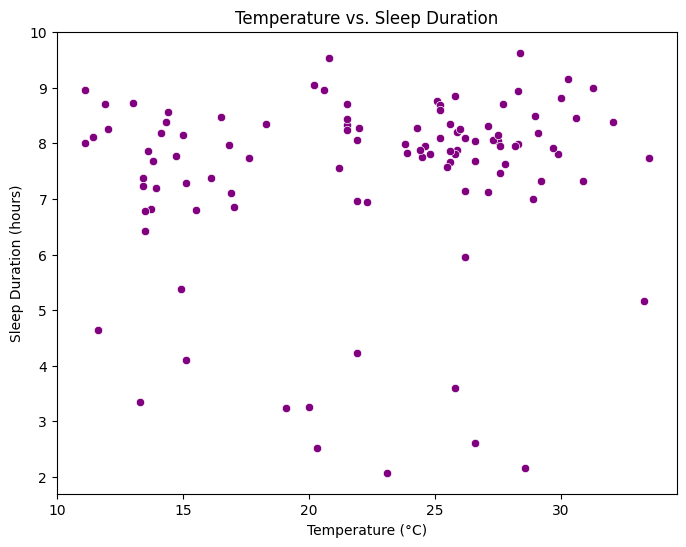

In [ ]:
merged_df = pd.merge(weather_df, sleep_df, on='Date')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='sleepDuration', data=merged_df, color='purple')
plt.title('Temperature vs. Sleep Duration')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

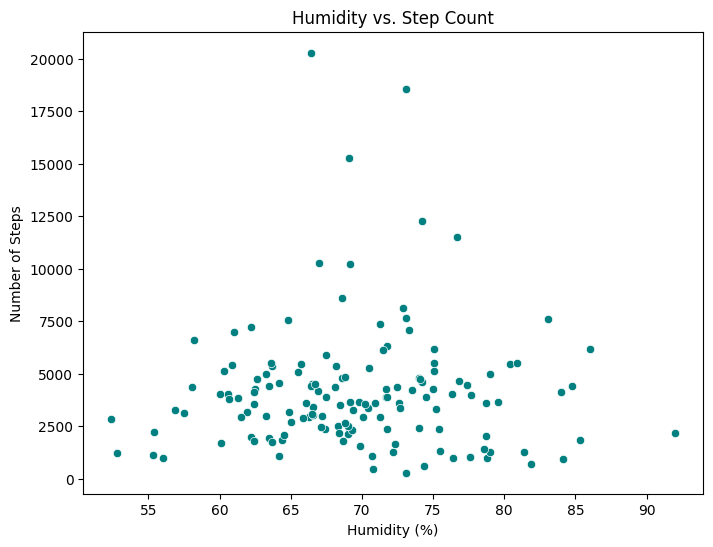

In [ ]:
merged_step_df = pd.merge(weather_df, step_df, on='Date')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='stepCount', data=merged_step_df, color='teal')
plt.title('Humidity vs. Step Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Steps')
plt.show()

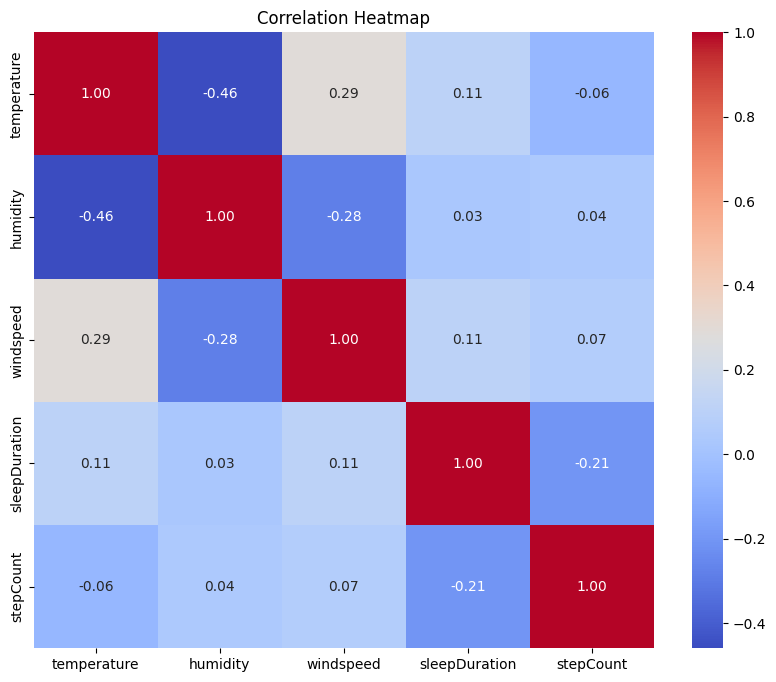

In [21]:
full_merged_df = weather_df.merge(sleep_df, on='Date').merge(step_df, on='Date')
corr_matrix = full_merged_df[['temperature', 'humidity', 'windspeed', 'sleepDuration', 'stepCount']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

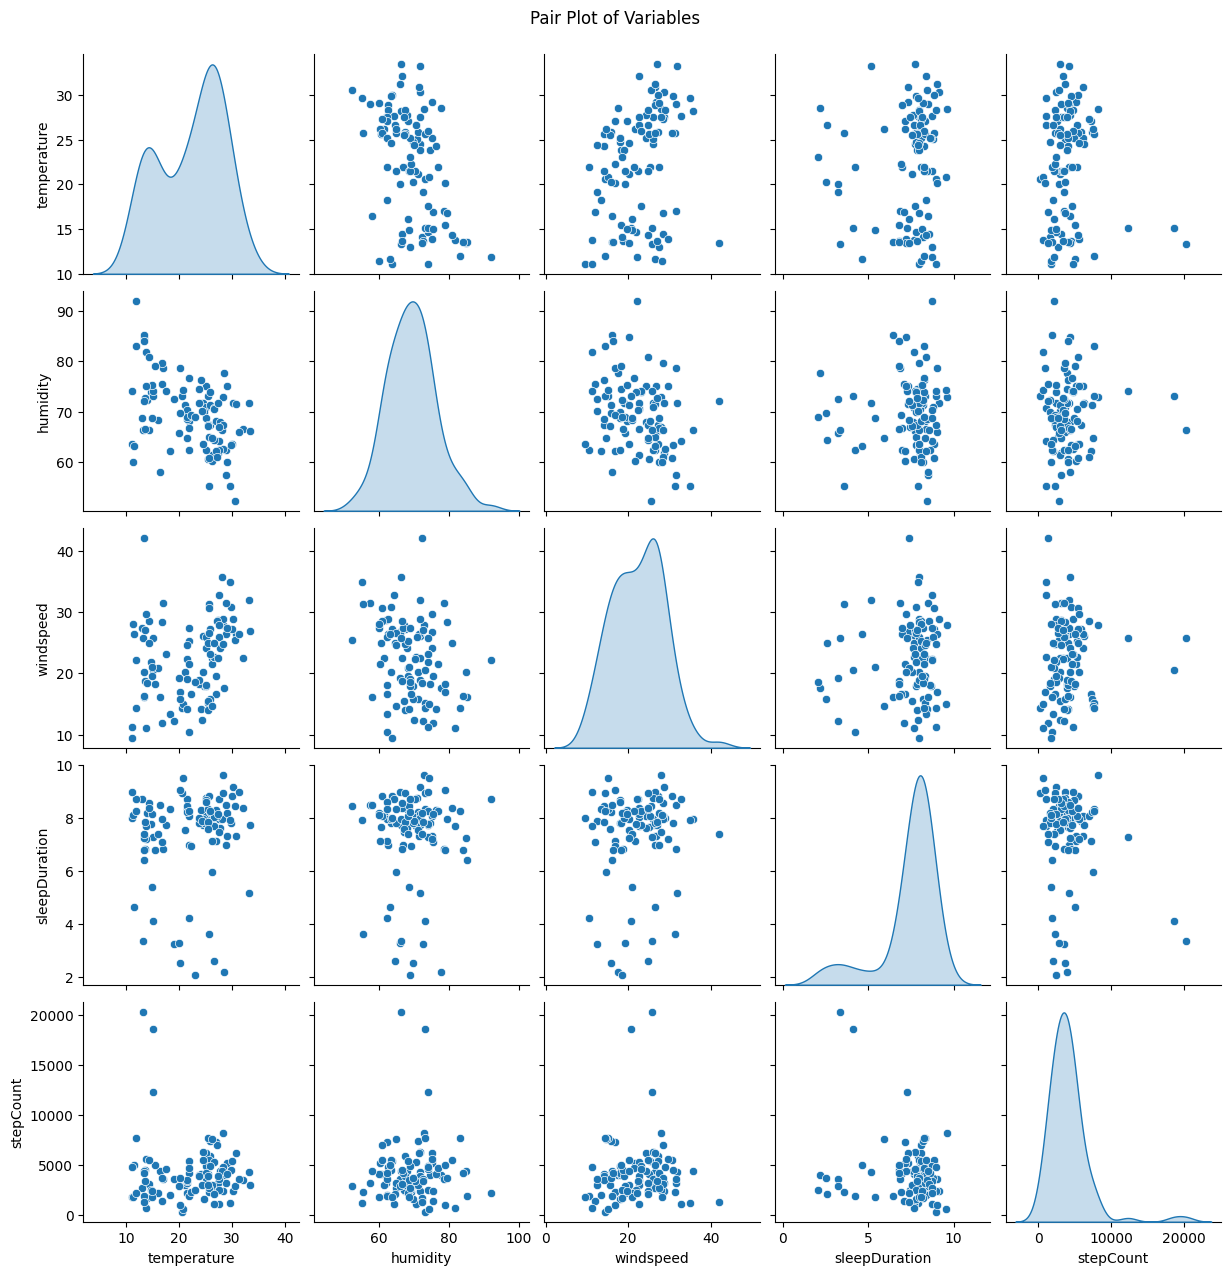

In [22]:
sns.pairplot(full_merged_df[['temperature', 'humidity', 'windspeed', 'sleepDuration', 'stepCount']], diag_kind='kde')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

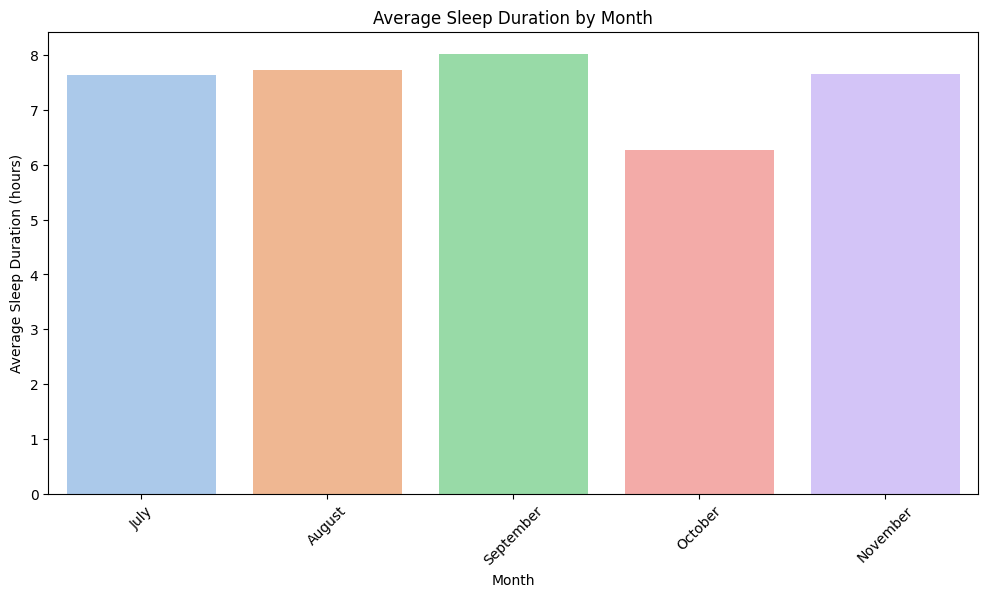

In [27]:
full_merged_df['Month'] = full_merged_df['Date'].dt.month_name()
avg_sleep = full_merged_df.groupby('Month')['sleepDuration'].mean().reindex([
    'July', 'August', 'September', 'October', 'November'
])

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sleep.index, y=avg_sleep.values, palette='pastel', hue=avg_sleep.index)
plt.title('Average Sleep Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

In [33]:
full_merged_df.head()

,Unnamed: 0_x,Date,temperature,humidity,windspeed,Unnamed: 0_y,sleepDuration,Unnamed: 0,stepCount,Month
0,0,2024-07-01,25.9,67.5,27.2,0,7.887778,0,5882,July
1,1,2024-07-02,27.1,68.3,19.6,1,8.314444,1,2498,July
2,2,2024-07-03,27.5,61.9,28.7,2,8.044722,2,3178,July
3,3,2024-07-04,25.2,75.1,24.2,3,8.088056,3,6168,July
4,4,2024-07-05,24.5,71.8,26.1,4,7.751667,4,6304,July


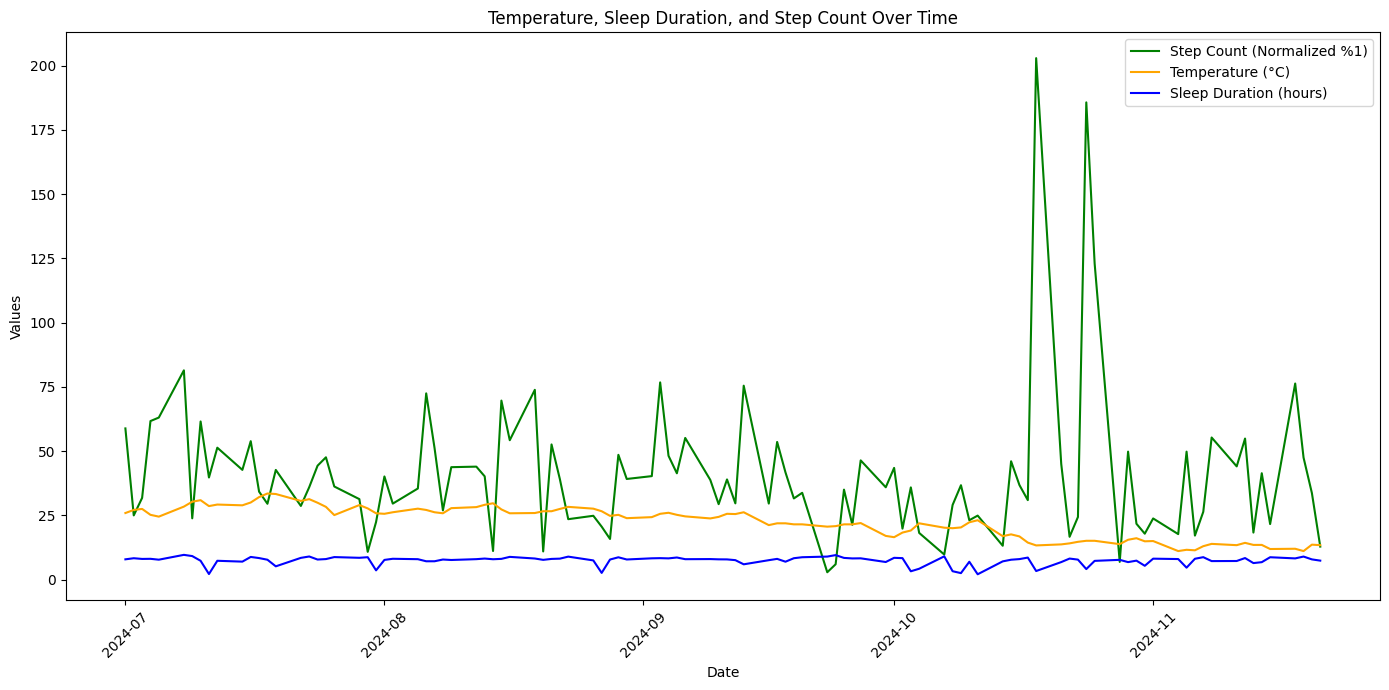

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(full_merged_df['Date'], full_merged_df['stepCount'] / 100, label='Step Count (Normalized %1)', color='green')
plt.plot(full_merged_df['Date'], full_merged_df['temperature'], label='Temperature (°C)', color='orange')
plt.plot(full_merged_df['Date'], full_merged_df['sleepDuration'], label='Sleep Duration (hours)', color='blue')
plt.title('Temperature, Sleep Duration, and Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

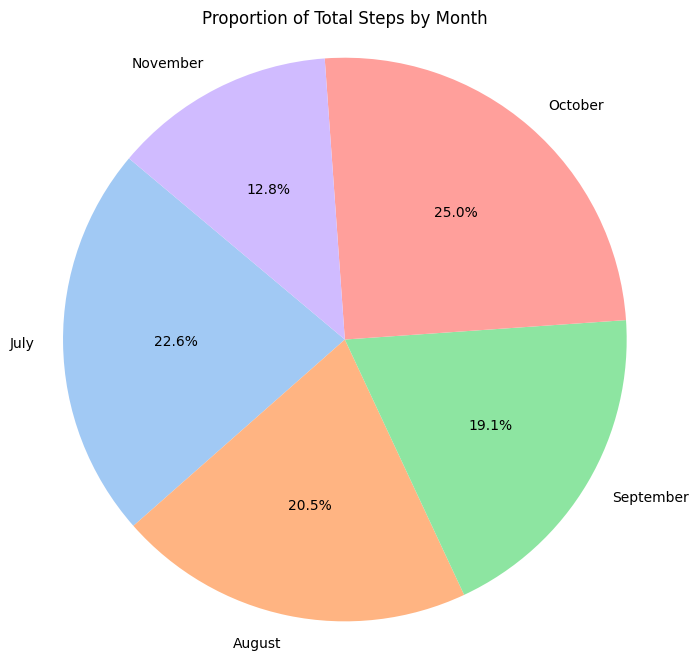

In [32]:
# Calculate total steps per month
total_steps = full_merged_df.groupby('Month')['stepCount'].sum().reindex([
    'July', 'August', 'September', 'October', 'November'
])

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_steps, labels=total_steps.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Total Steps by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

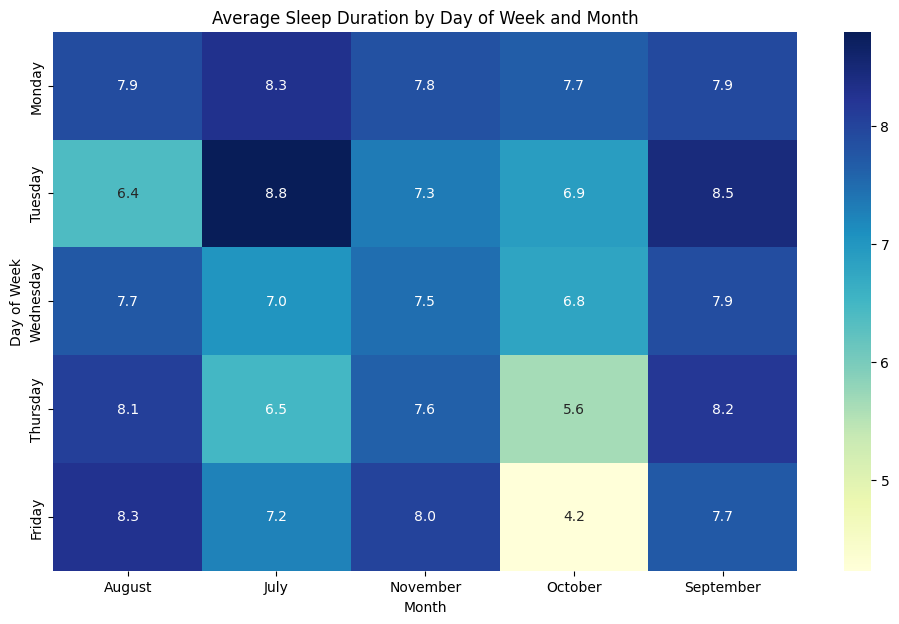

In [43]:
# Extract month and day of week
full_merged_df['Month'] = full_merged_df['Date'].dt.month_name()
full_merged_df['DayOfWeek'] = full_merged_df['Date'].dt.day_name()

# Pivot the data
pivot_sleep = full_merged_df.pivot_table(values='sleepDuration', index='DayOfWeek', columns='Month', aggfunc='mean')

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
pivot_sleep = pivot_sleep.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_sleep, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Sleep Duration by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

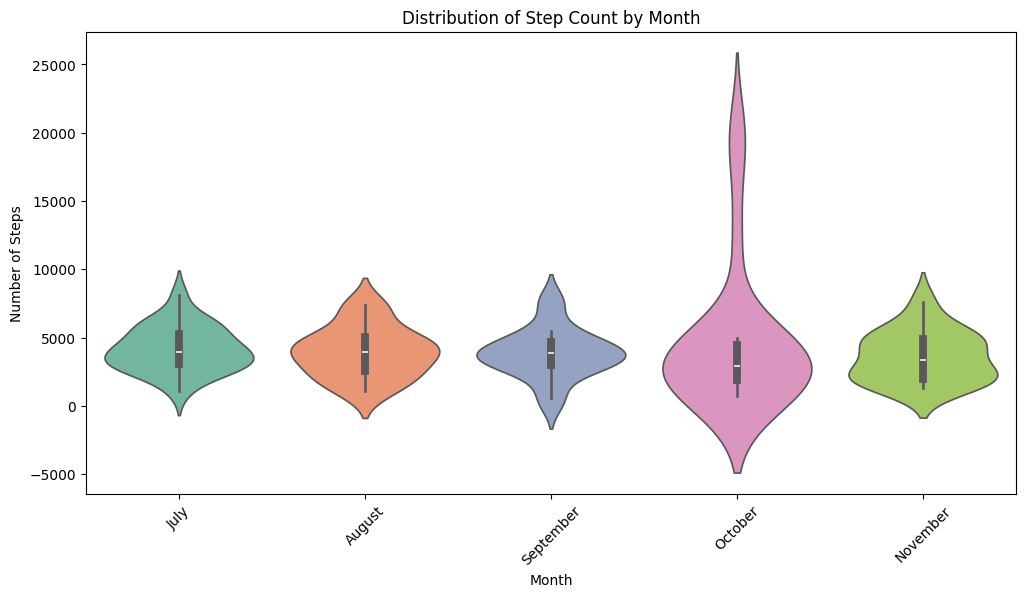

In [46]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='stepCount', data=full_merged_df, palette='Set2', hue = 'Month',
               order=[
                   'July', 'August', 'September', 'October', 'November'
               ])
plt.title('Distribution of Step Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.show()

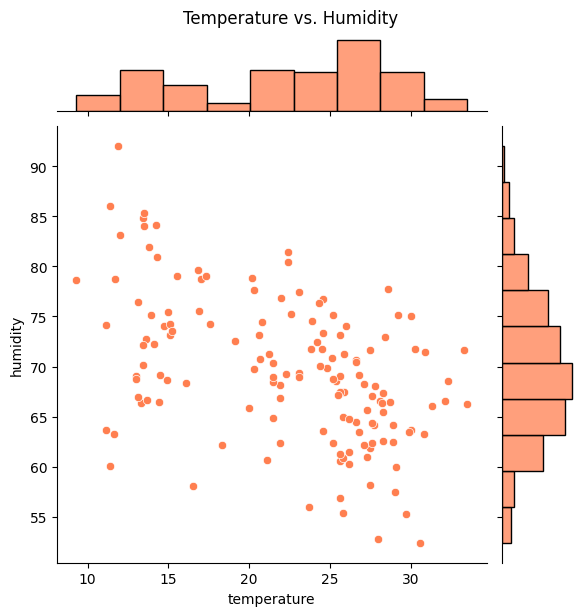

In [47]:
sns.jointplot(x='temperature', y='humidity', data=weather_df, kind='scatter', color='coral')
plt.suptitle('Temperature vs. Humidity', y=1.02)
plt.show()

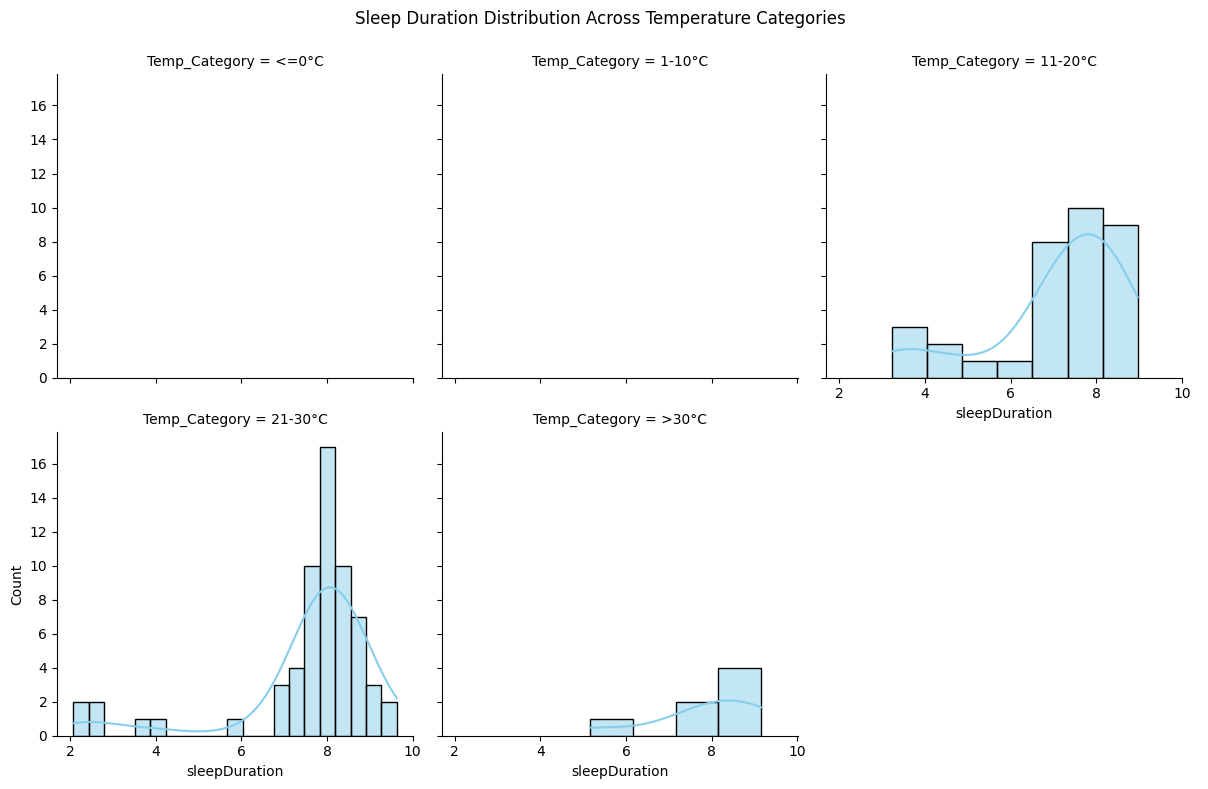

In [48]:
# Create temperature categories
full_merged_df['Temp_Category'] = pd.cut(full_merged_df['temperature'],
                                         bins=[-float('inf'), 0, 10, 20, 30, float('inf')],
                                         labels=['<=0°C', '1-10°C', '11-20°C', '21-30°C', '>30°C'])

# Plot facet grid
g = sns.FacetGrid(full_merged_df, col='Temp_Category', col_wrap=3, height=4)
g.map(sns.histplot, 'sleepDuration', kde=True, color='skyblue')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sleep Duration Distribution Across Temperature Categories')
plt.show()

# Results

Based on my data and visualizations, I observed the following insights about how weather conditions affect my walking and sleeping patterns:

1. **Step Count and Temperature**  
   - On days with higher temperatures, my step count tends to increase. This suggests that I am more active and walk more when the weather is warm.  
   - However, extremely high temperatures seem to slightly reduce my walking, as seen in a few data points.

2. **Step Count and Humidity**  
   - Days with moderate humidity levels correlate with more steps. Extremely high or low humidity does not seem to encourage much walking.  
   - My data shows that I avoid walking a lot on very humid days.

3. **Step Count and Wind Speed**  
   - Higher wind speeds are associated with lower step counts in my data. It seems I prefer to walk less on windy days, likely due to discomfort caused by the weather.  

4. **Sleep Duration and Temperature**  
   - My sleep duration remains fairly consistent between 7–9 hours, regardless of temperature. However, I notice slightly longer sleep durations on days with cooler temperatures.  
   - Extremely warm days (above 30°C) do not seem to affect my sleep negatively, but there is no significant improvement either.

5. **Sleep Duration and Humidity**  
   - On days with higher humidity, I tend to sleep slightly less. This might be due to discomfort caused by the humid environment.  
   - Moderate humidity seems to align with my optimal sleep duration.

6. **Sleep Duration and Wind Speed**  
   - Wind speed does not show a strong impact on my sleep duration. Whether the day is calm or windy, my sleep remains consistent.  

7. **Combined Effects**  
   - Warmer temperatures encourage me to walk more, and walking more during the day might slightly increase my sleep duration. However, the effect is not very strong.  
   - High humidity appears to reduce both my step count and sleep duration, indicating that I am less active and less comfortable on humid days.

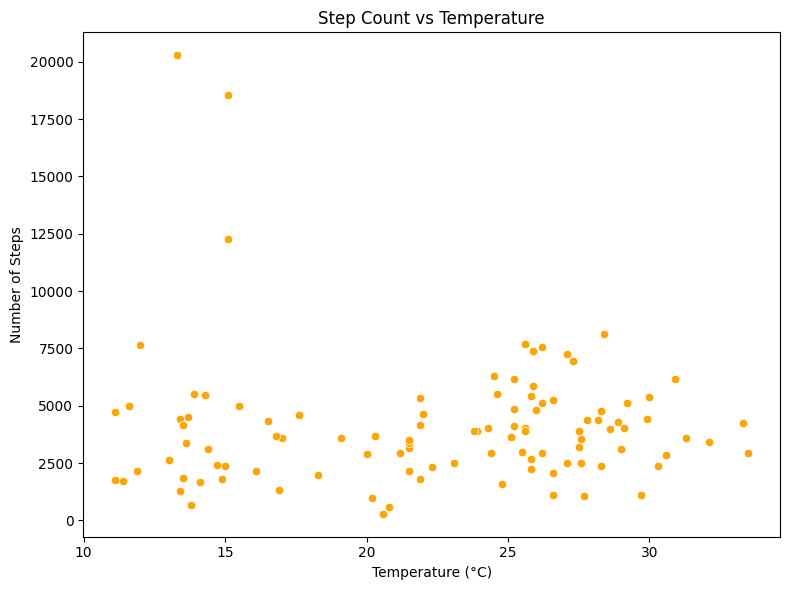

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='stepCount', data=full_merged_df, color='orange')
plt.title('Step Count vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Steps')
plt.tight_layout()
plt.show()

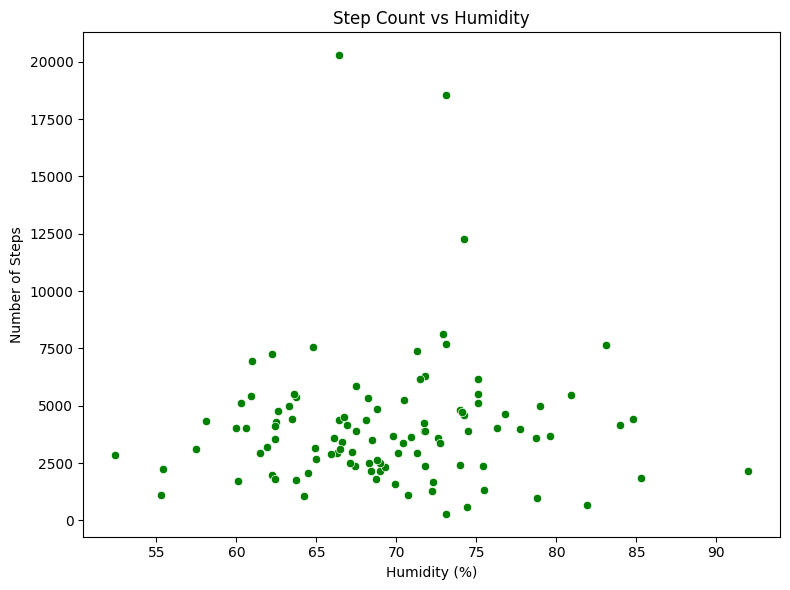

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='stepCount', data=full_merged_df, color='green')
plt.title('Step Count vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Steps')
plt.tight_layout()
plt.show()

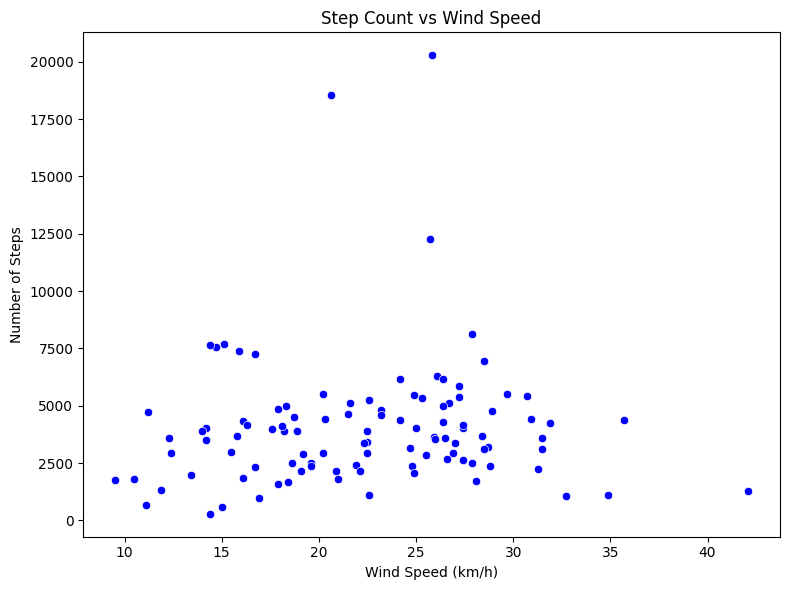

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='stepCount', data=full_merged_df, color='blue')
plt.title('Step Count vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Number of Steps')
plt.tight_layout()
plt.show()

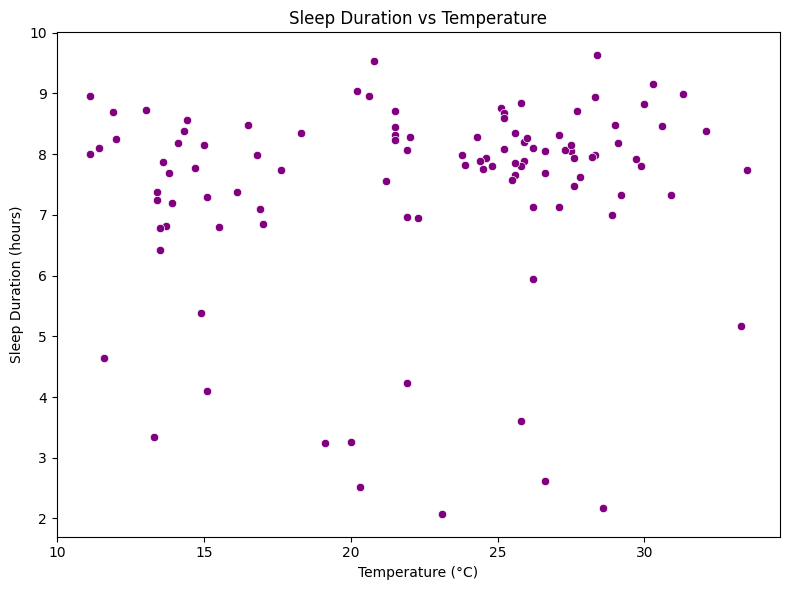

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='sleepDuration', data=full_merged_df, color='purple')
plt.title('Sleep Duration vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.show()

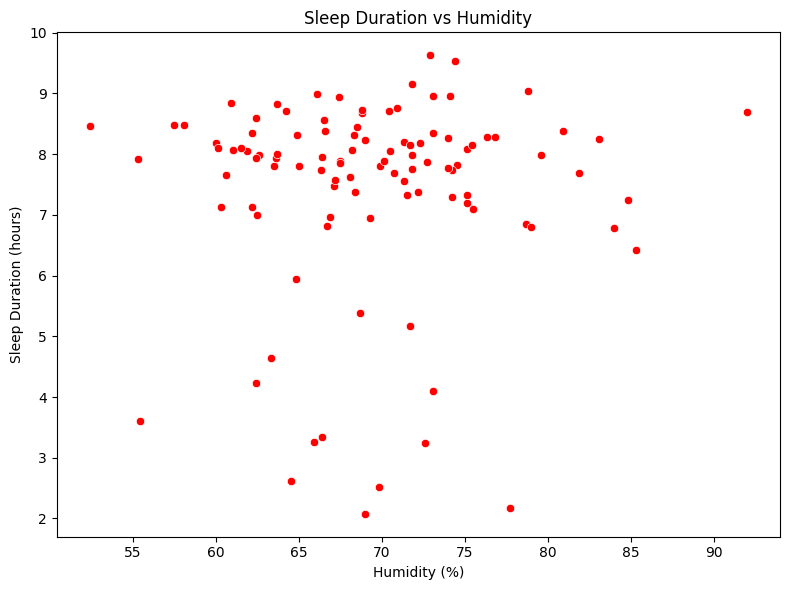

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='sleepDuration', data=full_merged_df, color='red')
plt.title('Sleep Duration vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.show()

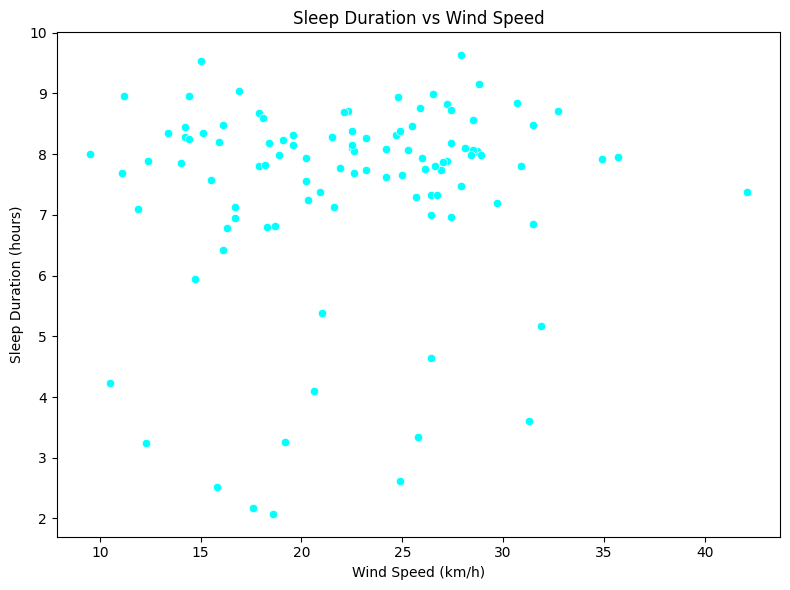

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='sleepDuration', data=full_merged_df, color='cyan')
plt.title('Sleep Duration vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.show()

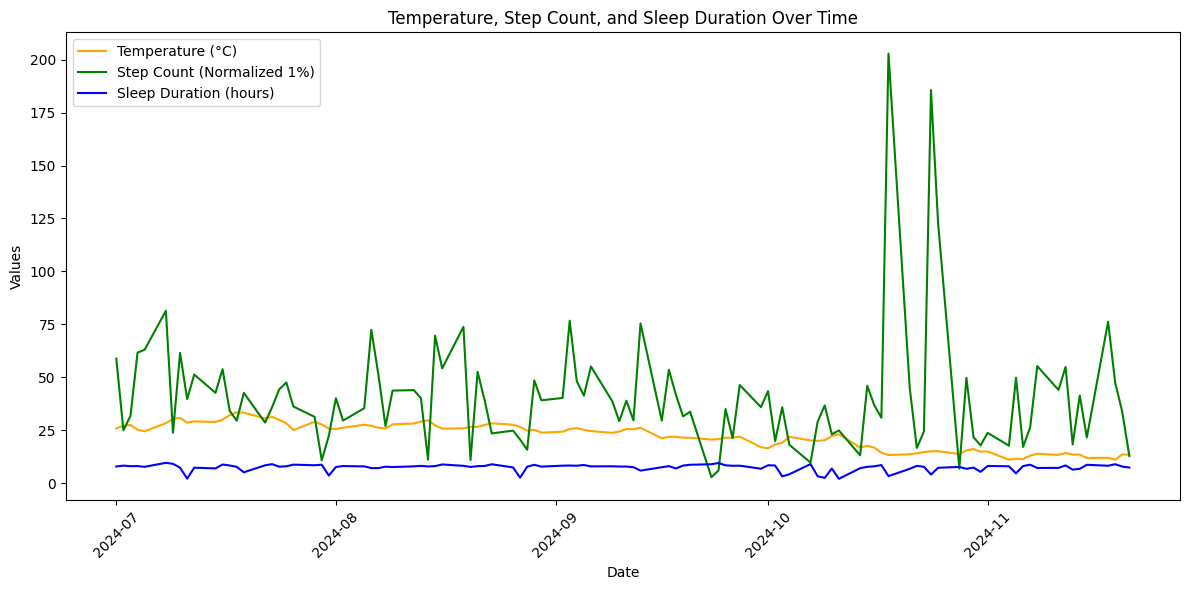

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(full_merged_df['Date'], full_merged_df['temperature'], label='Temperature (°C)', color='orange')
plt.plot(full_merged_df['Date'], full_merged_df['stepCount'] / 100, label='Step Count (Normalized 1%)', color='green')
plt.plot(full_merged_df['Date'], full_merged_df['sleepDuration'], label='Sleep Duration (hours)', color='blue')
plt.title('Temperature, Step Count, and Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()